### Logistic Regression

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

Dataset Loaded Successfully
Total instances: 10410
Class distribution: Counter({1: 5236, 0: 5174})
----------------------------------------------------------------------
Training instances: 8328
Testing instances : 2082
----------------------------------------------------------------------
LOGISTIC REGRESSION PERFORMANCE
Accuracy  : 0.8088
Precision : 0.8041
Recall    : 0.8195
F1-score  : 0.8117
ROC-AUC   : 0.9019
----------------------------------------------------------------------
Confusion Matrix (Properly Labeled)
                     Predicted No Churn (0)  Predicted Churn (1)
Actual No Churn (0)                     826                  209
Actual Churn (1)                        189                  858
----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.80      0.82      0.81      1047

    accuracy           

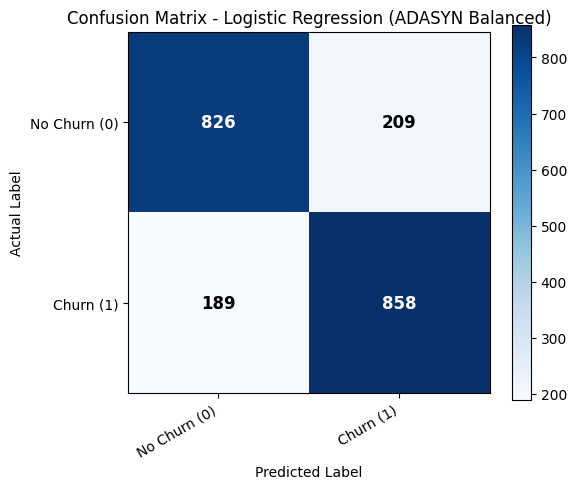

In [8]:
# ==============================
# LOAD DATASET
# ==============================
df = pd.read_csv("../mid-data/adasyn_balanced.csv")

target_col = "Churn"

print("Dataset Loaded Successfully")
print("Total instances:", len(df))
print("Class distribution:", Counter(df[target_col]))
print("-" * 70)

# ==============================
# FEATURES & TARGET
# ==============================
X = df.drop(columns=[target_col])
y = df[target_col]

# ==============================
# TRAIN-TEST SPLIT
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training instances:", len(X_train))
print("Testing instances :", len(X_test))
print("-" * 70)

# ==============================
# LOGISTIC REGRESSION MODEL
# ==============================
model = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

model.fit(X_train, y_train)

# ==============================
# PREDICTIONS
# ==============================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ==============================
# METRICS
# ==============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("LOGISTIC REGRESSION PERFORMANCE")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")
print("-" * 70)

# ==============================
# CONFUSION MATRIX (TABLE)
# ==============================
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual No Churn (0)", "Actual Churn (1)"],
    columns=["Predicted No Churn (0)", "Predicted Churn (1)"]
)

print("Confusion Matrix (Properly Labeled)")
print(cm_df)
print("-" * 70)

# ==============================
# CLASSIFICATION REPORT
# ==============================
print("Classification Report")
print(classification_report(y_test, y_pred))

# ==============================
# CONFUSION MATRIX PLOT (MATPLOTLIB ONLY)
# ==============================
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap=plt.cm.Blues)

classes = ["No Churn (0)", "Churn (1)"]

ax.set_title("Confusion Matrix - Logistic Regression (ADASYN Balanced)")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

threshold = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center",
            va="center",
            fontsize=12,
            fontweight="bold",
            color="white" if cm[i, j] > threshold else "black"
        )


plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()